# Week 4 - Univariate Analysis, part 2

TABLE OF CONTENT
==================

* [JUMP TO Q2 - ANSWERS](#Q2A)

---


# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

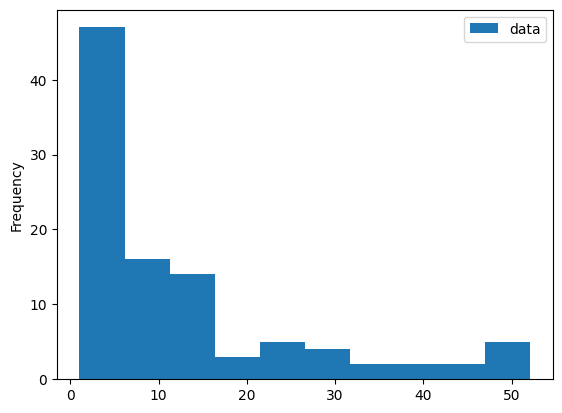

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

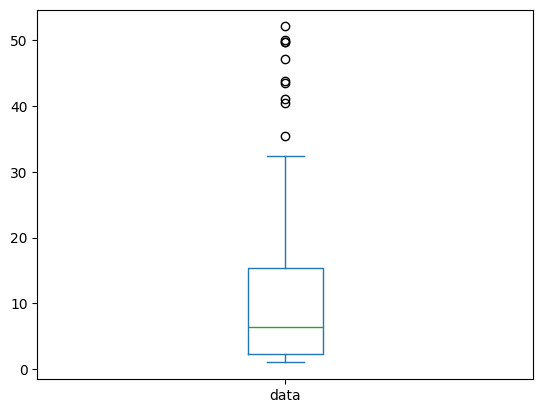

In [3]:
df.plot.box()

<a id="cell2"></a>

### ***answer***

Between boxplot and histogram, boxplot gives more statistical information such as the median line, the quartiles, and the extreme values. Histogram mostly gives the spread and the count of each event. However, boxplot may be preferred on academic research or people involved in statistics. Thus, histogram is usually used in most cases as more readers (or lay persons) can easily digest or understand the graph. To make it more interesting, we can always add median line, or color the extreme values in the histogram to give similar information as a boxplot.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

        ----        ----        ----

### *ANSWER*

#### DATA IMPORT -------------

In [ ]:
import pandas as pd
import numpy as np
import openpyxl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from plotnine import *

In [ ]:
#### DATASET1 = MIMIC dataset

df1 = pd.read_csv('dataset - acute kidney injury in MIMIC.csv')


#### DATASET2 = chronic kidney

df2 = pd.read_csv('chronic_kidney_disease_prepared.csv')


#### DATASET3 
 
df3 = pd.read_excel('Diabetic_Nephropathy_v1.xlsx')

#### SHOWCASE -------------

##### DATASET 1 _______

- Consist 57 columns
- some important colums are:
    - aki_stage = state of acute kidney disease
    - anemia = presence of anemia (0 or 1)

In [31]:
df1.columns

Index(['gender', 'age', 'race', 'unit', 'bmi', 'weight', 't', 'p', 'r', 'bp',
       'vent_firstday', 'vaso_firstday', 'chf', 'ckd', 'liver', 'pulmonary',
       'hypertension', 'malignancy', 'stroke', 'cad', 'diabetes', 'hiv',
       'anemia', 'drug_abuse', 'alcohol_abuse', 'sepsis', 'aki_stage', 'sofa',
       'sapsii', 'mort_28_day', 'mort_90_day', 'mort_1_year', 'cox_los', 'sii',
       'plr', 'nlr', 'mlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 'mn', 'rdw',
       'hb', 'plt', 'ck', 'ph', 'cl', 'na', 'k', 'bicarbonate', 'scr', 'bun',
       'po2', 'pco2', 'lactate'],
      dtype='object')

In [46]:
# df1['aki_stage'].value_counts()
df1['rbc'].head()

0    2.70
1    3.11
2    3.78
3    3.48
4    3.73
Name: rbc, dtype: float64

/tmp/ipykernel_842/1092218953.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


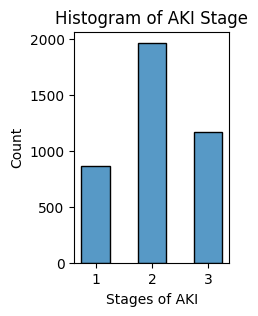

In [45]:
plt.figure(figsize=(2, 3))
sns.histplot(data=df1, x='aki_stage', discrete=True, shrink=0.5, palette='Greys')
plt.title("Histogram of AKI Stage")
plt.xlabel("Stages of AKI")
plt.ylabel("Count")
plt.show()

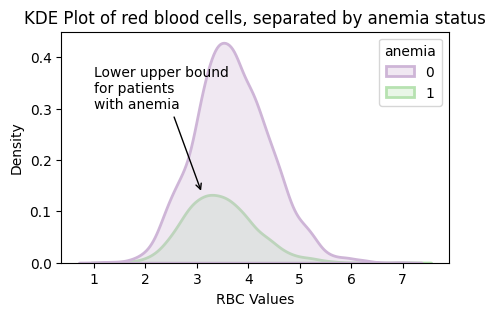

In [58]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=df1, x='rbc', hue='anemia', fill=True, alpha=0.3, linewidth=2, palette='PRGn')

plt.title("KDE Plot of red blood cells, separated by anemia status")
plt.xlabel("RBC Values")
plt.ylabel("Density")
plt.annotate("Lower upper bound \nfor patients \nwith anemia", xy=(3.1, .135), xytext=(1, .3),
             arrowprops=dict(arrowstyle="->", color="black", lw=1),
             fontsize=10, color="black")
plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

In [ ]:
q4x = pd.DataFrame({'x': np.random.normal(0,1,10), 'y': np.random.normal(0,1,10)})

In [20]:
q4x

,x,y
0,0.073891,-0.159875
1,0.066214,-0.272768
2,0.008042,-0.830255
3,-1.526741,-1.309843
4,-1.317877,1.162699
5,-1.606216,-1.793195
6,0.883204,0.622670
7,-0.555904,0.049381
8,0.090761,-0.304445
9,1.204249,-0.675185


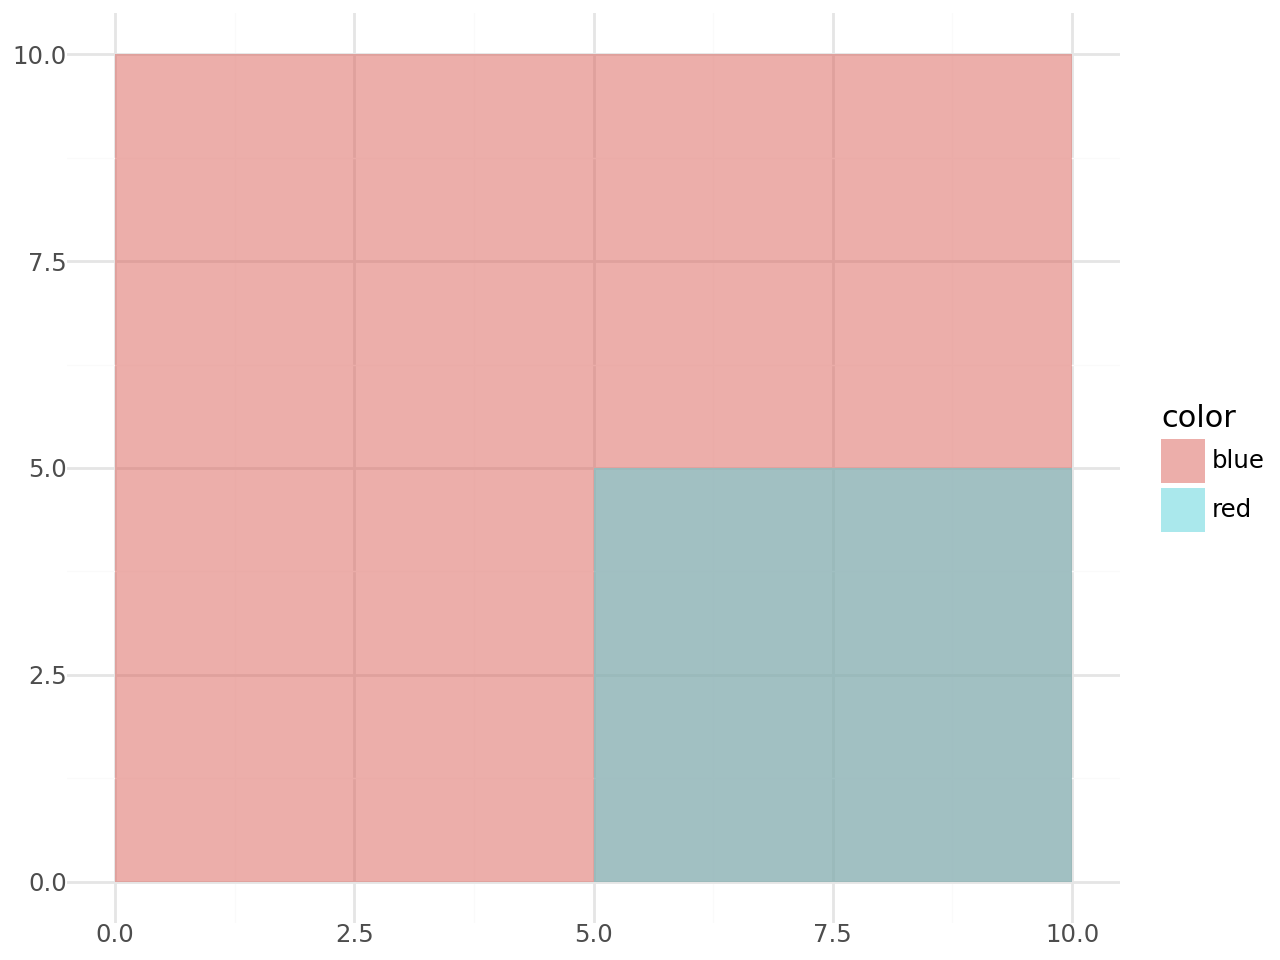

In [29]:


g = (ggplot(q4x) +
  geom_point(aes('x','y')) +
  geom_ribbon(aes(x = 'x', ymin = min('y'), ymax = 0), fill = 'red')
)


b = (ggplot(q4x) +
    # geom_rect(xmin = 5, xmax = 10, ymin = 0, ymax = 5, fill = '#057CD0') +
    # geom_rect(xmin = 0, xmax = 10, ymin = 0, ymax = 10, fill = '#E6EDF3') +
    # geom_rect(xmin = 8, xmax = 10, ymin = 0, ymax = 8, fill = '#A3C4DB') +

    geom_rect(xmin = 5, xmax = 10, ymin = 0, ymax = 5, fill = 'red') +
    geom_rect(xmin = 0, xmax = 10, ymin = 0, ymax = 10, fill = 'green', alpha = 0.8) +
    geom_rect(xmin = 8, xmax = 10, ymin = 0, ymax = 8, fill = 'blue') +
    theme_minimal()
    )


c = (ggplot() +
    geom_ribbon(aes(x = 0, ymin = -1, ymax = 1))
)


d_df = pd.DataFrame({
    'xmin': [0, 5],  # Start x-coordinates
    'xmax': [10, 10],  # End x-coordinates
    'ymin': [0, 0],  # Start y-coordinates
    'ymax': [10, 5],  # End y-coordinates
    'color': ['blue', 'red']  # Colors for distinction
})

# Create plot
plotd = (
    ggplot(d_df)
    + geom_rect(aes(xmin='xmin', xmax='xmax', ymin='ymin', ymax='ymax', fill='color'), alpha=0.5)
    + theme_minimal()
)

plotd 

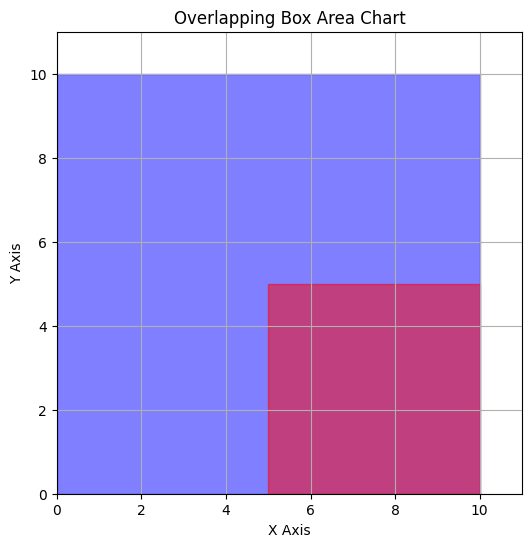

In [28]:
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Add first box (x: 0 to 10, y: 0 to 10)
rect1 = patches.Rectangle((0, 0), 10, 10, edgecolor='blue', facecolor='blue', alpha=0.5)

# Add second box (x: 5 to 10, y: 0 to 5)
rect2 = patches.Rectangle((5, 0), 5, 5, edgecolor='red', facecolor='red', alpha=0.5)

# Add rectangles to plot
ax.add_patch(rect1)
ax.add_patch(rect2)

# Set limits and labels
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Overlapping Box Area Chart")

# Show plot
plt.grid(True)
plt.show()